- dataset
- identtify research question
what variables can strongly determine the quality of an apple? 


- explore dataset

- method: 
ML logistic regression. Logistic since apple quality is binary (Good or Bad). And since I can see the coefficients which strongly correlate with predicting apple quality. 

- present findinds
- include limitations
- future work 



## Datasets: 

apple quality: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Initial data exploration

- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

Dataset has already been scaled. 

In [94]:
## get data
appledf = pd.read_csv('data/apple_quality.csv')
display(appledf.head())
appledf.info()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [95]:
print('Columns with missing data:\n',appledf.isna().any())

Columns with missing data:
 A_id            True
Size            True
Weight          True
Sweetness       True
Crunchiness     True
Juiciness       True
Ripeness        True
Acidity        False
Quality         True
dtype: bool


In [96]:
print(f"Any duplicates in ID: {appledf.duplicated(subset='A_id').any()}")
print(f"Any duplicates in df: {appledf.duplicated().any()}")

Any duplicates in ID: False
Any duplicates in df: False


# Data cleaning 
- remove last row, not valid entry
- remove Nan


In [97]:
df = (
    appledf[:-1]
    .set_index('A_id')
    .dropna()
    .assign(Acidity = lambda x: (x['Acidity'].astype(float)))
)

## Data visualisation and analysis 

In [98]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


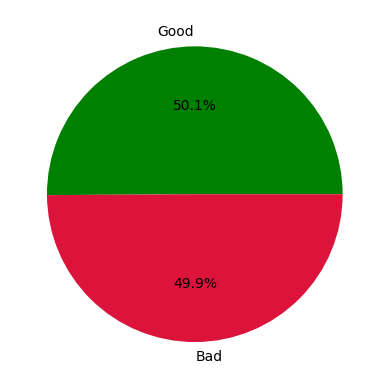

In [147]:
# share of good bad apples 
apple_share = pd.DataFrame(df.Quality.value_counts(normalize=True))

fig, ax = plt.subplots()
ax.pie(apple_share['Quality'].values, labels=apple_share.index.str.capitalize(), autopct='%1.1f%%',colors=['green','crimson'])
plt.show()

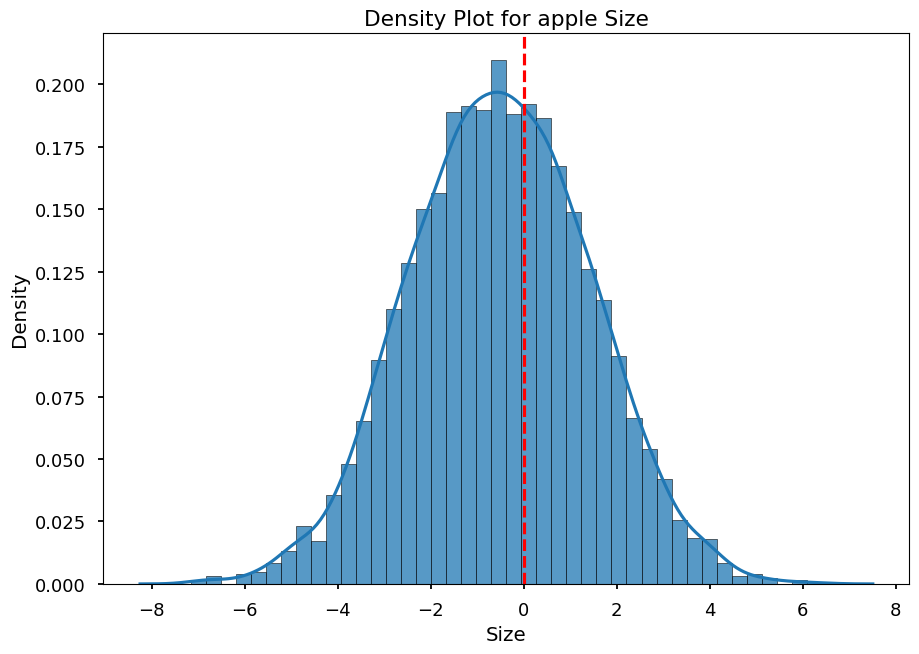

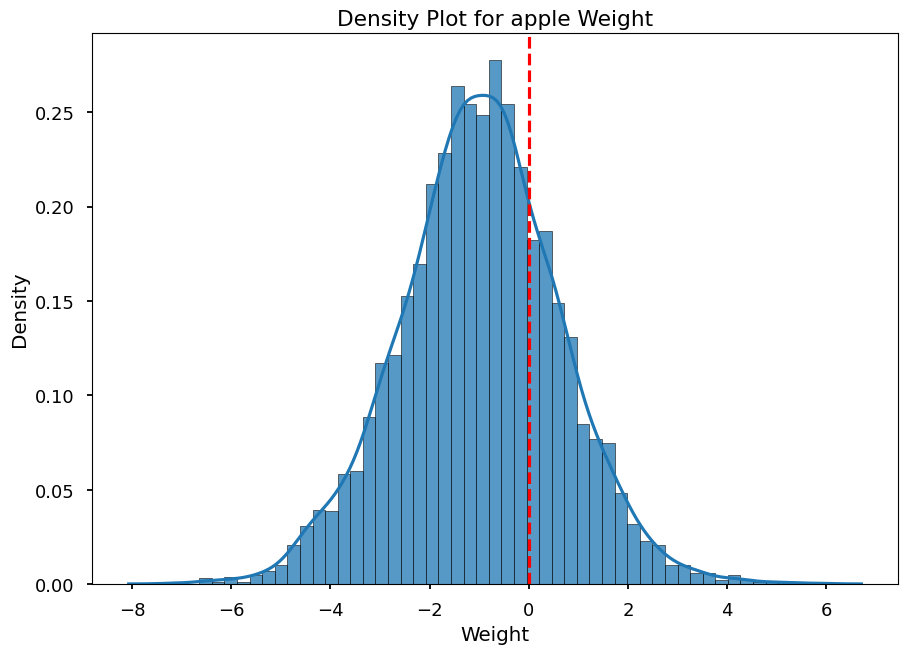

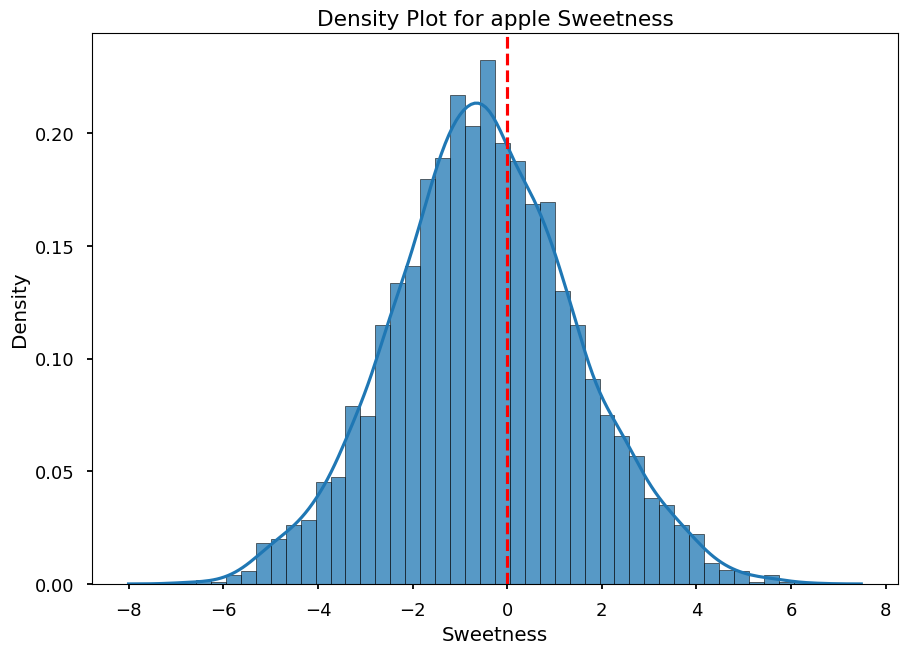

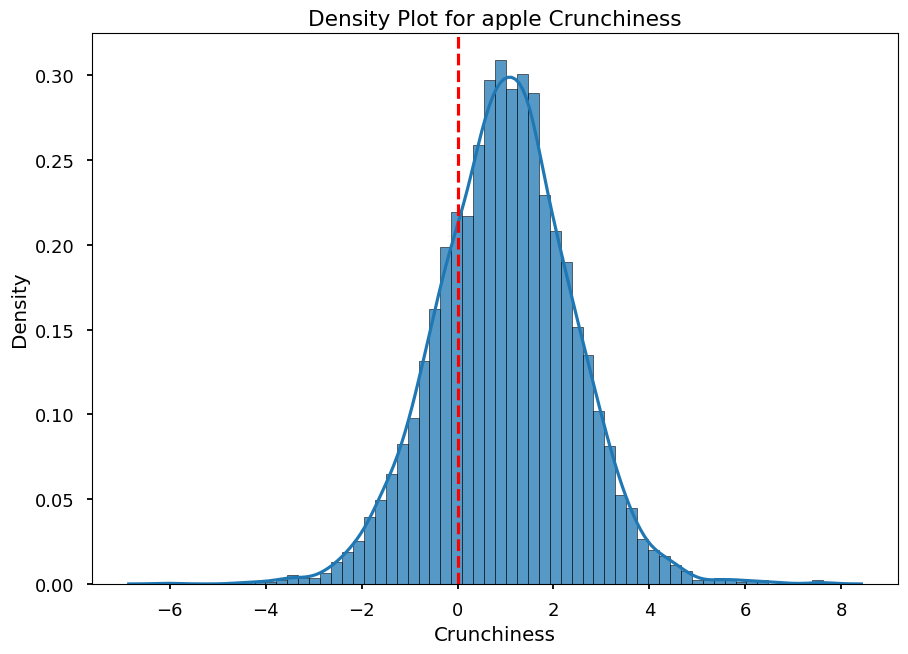

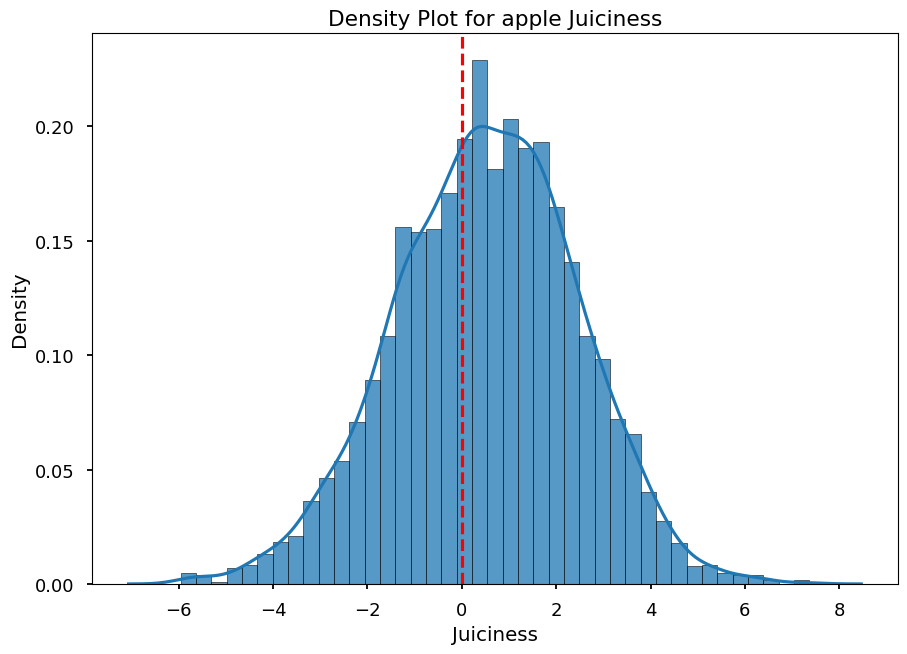

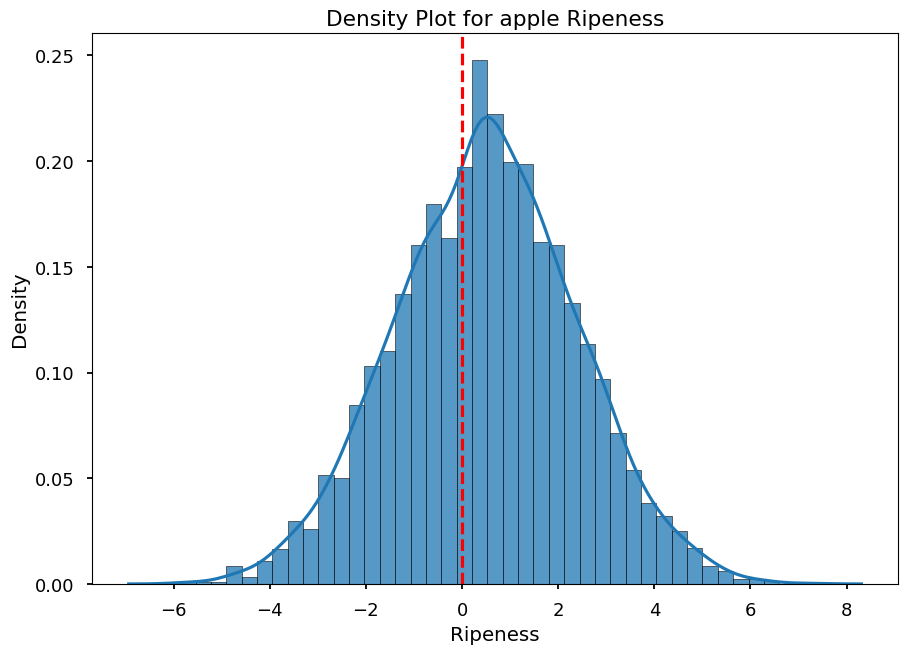

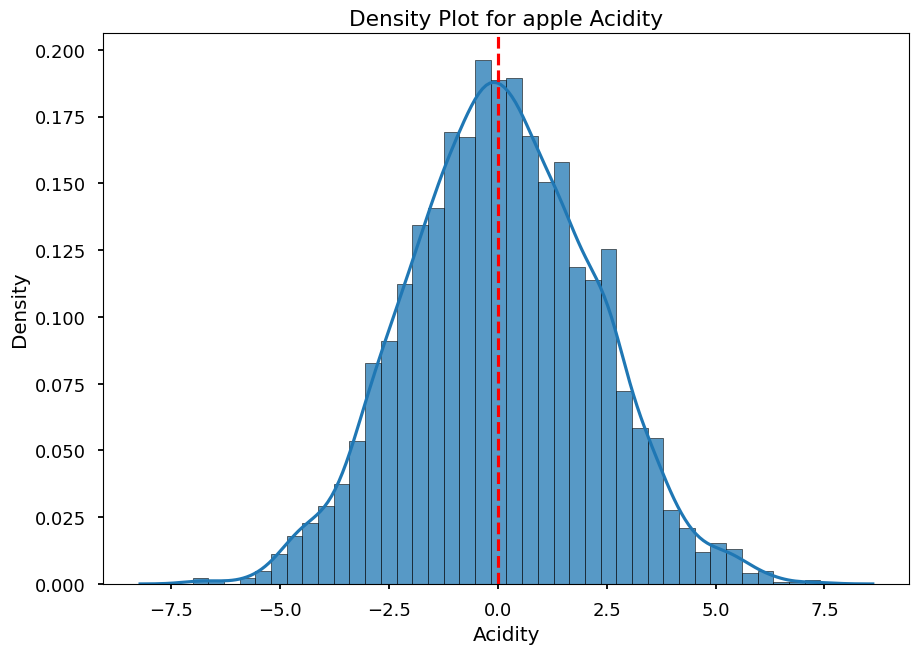

In [108]:
def density(df, var): 
    data = df[var]  # Selecting the specific column for the density plot
    plt.style.use("seaborn-talk")
    sns.kdeplot(data)
    sns.histplot(data,stat = 'density')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(f'Density Plot for apple {var}')
    plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
    plt.show()

# distribution of variables
for col in df.columns.tolist()[:-1]: 
    density(df, col)

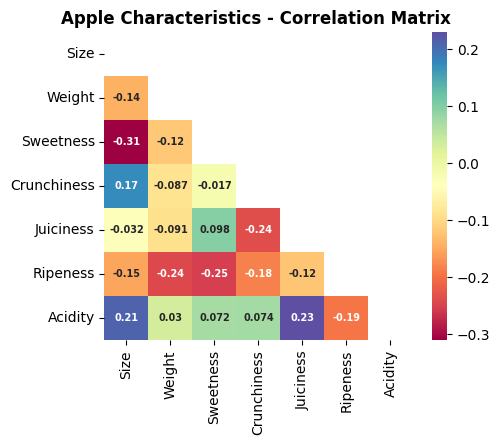

In [118]:
# correlation matrix 

corr_matrix = df.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

plt.figure(figsize = (5,4))
plt.style.use('default')
sns.heatmap(corr_matrix, cmap = 'Spectral', annot = True, annot_kws = {'fontsize':7, 'fontweight':'bold'}, square = True, mask = mask)
plt.title("Apple Characteristics - Correlation Matrix ", fontsize = 12, fontweight = "bold")
plt.show()

## Data preprocessing 

- make labels for y
- split into train and test

## Machine leaning 
- logistic regress
- evaluate model 
- confusion matrix 

